In [1]:
# project: p8
# submitter-netid: enmccabe
# partner-netid: none

In [2]:
import csv
import copy

In [3]:
small_mapping = open('small_mapping.csv', encoding='utf-8')
file_reader = csv.reader(small_mapping)
data = list(file_reader)

In [4]:
def get_mapping(path):
    small_mapping = open(path, encoding='utf-8')
    file_reader = csv.reader(small_mapping)
    data = list(file_reader)
    d = {}
    for row in data:
        d[row[0]] = row[1]
    return d

In [5]:
#q1
mapping = get_mapping("small_mapping.csv")
mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [6]:
#q2
mapping['tt0313542']

'Runaway Jury'

In [7]:
#q3
tt_list = []
for key in mapping:
    if key[0:2] == 'tt':
        tt_list.append(mapping[key])
tt_list

['Runaway Jury', 'Lethal Weapon']

In [8]:
#q4
garys = []
for key in mapping:
    if mapping[key][0:5].lower() == "gary ":
        garys.append(key)
garys

['nm0000997', 'nm0001219']

In [9]:
#q5
def get_raw_movies(path):
    small_mapping = open(path, encoding='utf-8')
    file_reader = csv.reader(small_mapping)
    data = list(file_reader)
    header = data[0]
    keys = header
    movies_list = []
    for row in data[1:]:
        dic = {}
        for i in range(len(keys)):
            if keys[i] in ['directors','actors','genres']:
                dic[keys[i]] = row[i].split(',')
            elif keys[i] in ['year']:
                dic[keys[i]] = int(row[i])
            elif keys[i] in ['rating']:
                dic[keys[i]] = float(row[i])
            else:
                dic[keys[i]] = row[i]
        movies_list.append(dic)
    return movies_list

raw_movies = get_raw_movies("small_movies.csv")
raw_movies

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [10]:
small_mapping = open("small_movies.csv", encoding='utf-8')
file_reader = csv.reader(small_mapping)
data = list(file_reader)
header = data[0]
print(header)

['title', 'year', 'rating', 'directors', 'actors', 'genres']


In [11]:
#q6
first = raw_movies[0]
first_genre = first['genres']
len(first_genre)

3

In [12]:
#q7
second = raw_movies[1]
second_actors = second['actors']
second_actors[-1]

'nm0752751'

In [13]:
def get_movies(movies_path, mapping_path):
    movie_list = get_raw_movies(movies_path)
    mapping_list = get_mapping(mapping_path)
    for movie in movie_list:
        movie["title"] = mapping_list[movie["title"]]
        
        for i in range(len(movie["directors"])):
            movie["directors"][i] = mapping_list[movie["directors"][i]]
        
        for i in range(len(movie["actors"])):
            movie["actors"][i] = mapping_list[movie["actors"][i]]
    
    return movie_list
small = get_movies("small_movies.csv", "small_mapping.csv")
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [14]:
#q8
small[0]["title"]

'Runaway Jury'

In [15]:
#q9
small[1]["directors"]

['Richard Donner']

In [16]:
#q10
small[-1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [17]:
#q11
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [18]:
movies = get_movies("movies.csv", "mapping.csv")

In [19]:
#q12
movies[0:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [20]:
#q13
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [21]:
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [22]:
#q14
movie_copy = copy.deepcopy(movies)
filter_movies_by_year(movie_copy, 1930)


[{'title': 'Hook Line and Sinker',
  'year': 1930,
  'rating': 6.4,
  'directors': ['Edward F. Cline'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Ralf Harolde'],
  'genres': ['Comedy', 'Romance']},
 {'title': 'The Big Trail',
  'year': 1930,
  'rating': 7.2,
  'directors': ['Raoul Walsh', 'Louis R. Loeffler'],
  'actors': ['John Wayne', 'El Brendel', 'Tully Marshall'],
  'genres': ['Adventure', 'Romance', 'Western']}]

In [23]:
#q15
movie_copy = copy.deepcopy(movies)
filter_movies_by_year(movie_copy, 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [24]:
#q16
def unique_names(category):
    unique_genres = []
    for movie in movies:
        for genre in movie[category]:
            unique_genres.append(genre)    
    return len(set(unique_genres))
unique_names('genres')
    
#make empty list
#add first genres to it
#make if statement: if new genre == genre continue
#else add to list
#count function?

18

In [25]:
#q17
unique_names('actors')

2605

In [26]:
#q18
unique_names('directors')

1247

In [27]:
#q19
total_rating = 0
count = 0
avg = 0
for movie in movies:
    total_rating += movie['rating']
    count += 1
avg = total_rating/count
avg

6.401659528907912

In [28]:
#q20
max_lenght = 0
max_title = ''
for movie in movies:
    title_lenght = 0
    for i in movie['title']:
        title_lenght += 1
        if title_lenght > max_lenght:
            max_lenght = title_lenght
            max_title = movie['title']
max_title

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [29]:
def bucketize(movies_list, movie_key):
    d = {}
    for movie in movies_list:
        if type(movie[movie_key]) != list:
            val = movie[movie_key]
            if val in d:
                d[val].append(movie)
            else:
                d[val] = []
                d[val].append(movie)
        else:
            for item in movie[movie_key]:
                if item in d:
                    d[item].append(movie)
                else:
                    d[item] = []
                    d[item].append(movie)
            
    return d
bucketize(small, 'year')

{2003: [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 1987: [{'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}]}

In [30]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [31]:
#q21
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [32]:
#q22
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [33]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [34]:
#q24
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [35]:
#q25
len(bucketize(small, "actors"))

7

In [36]:
#q26
len(bucketize(movies,"genres"))

18

In [37]:
#q27
genre_dict={}
for key in bucketize(movies, "genres"):
    genre_dict[key] = len(bucketize(movies, 'genres')[key])
genre_dict

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [38]:


def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)
    

In [39]:
%matplotlib inline

In [40]:
import matplotlib, pandas

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

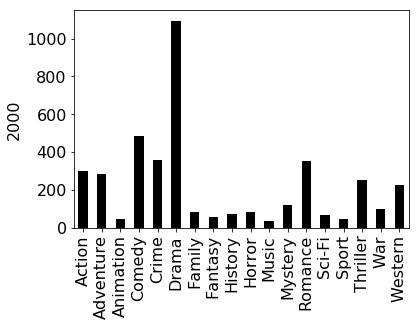

In [41]:
#q28
plot_dict(genre_dict, '2000')

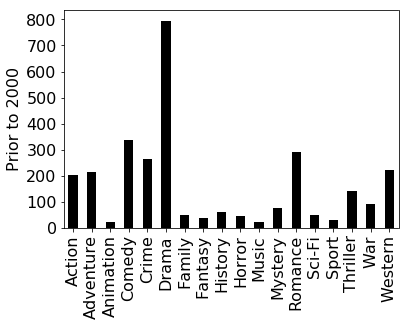

In [42]:
#q29
genre_d={}

B = bucketize(movies, 'genres')
for genre in B:
    genre_d[genre] = 0
    for movie in B[genre]:
        if movie['year'] < 2000:
            genre_d[genre] += 1
        
        

plot_dict(genre_d, "Prior to 2000")

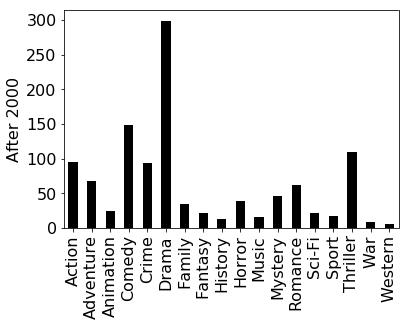

In [43]:
#q30
genre_d={}

B = bucketize(movies, 'genres')
for genre in B:
    genre_d[genre] = 0
    for movie in B[genre]:
        if movie['year']  >= 2000:
            genre_d[genre] += 1
        
        

plot_dict(genre_d, "After 2000")

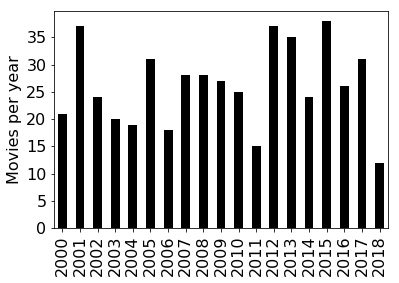

In [44]:
#q31
genre_e={}
B = bucketize(movies, 'year')
for year in B:
    if year >= 2000:
        genre_e[year] = len(B[year])
    
        
        

plot_dict(genre_e, "Movies per year")

In [45]:
#q32
directors_dict={}
director_bucket = bucketize(movies, 'directors')
for director in director_bucket:
    m = director_bucket[director]
    years = []
    for movie in m:
        years.append(movie['year'])
    if max(years) - min(years) >= 30:
        directors_dict[director] = max(years) - min(years)

            
directors_dict
#how do you compare the first and last year that a director worked

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [46]:
#q33
actors_dict={}

actors_bucket = bucketize(movies, 'actors')
for actor in actors_bucket:
    n = actors_bucket[actor]
    years = []
    
    for movie in n:
        years.append(movie['year'])
    if max(years) - min(years) >= 40:
        actors_dict[actor] = max(years) - min(years)

            
actors_dict

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Dennis Quaid': 40,
 'Marlon Brando': 49,
 'Armand Assante': 40,
 'Eddie Albert': 41,
 'Jon Voight': 44,
 'Tony Curtis': 45,
 'Michael Constantine': 42,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Fredric March': 41,
 'Lloyd Bridges': 44,
 'Robert Redford': 44,
 'Dean Stockwell': 53}

In [47]:
#q34
def row_ranking(row):
    return row["span"]

def top_n_span(span_bucket, n):
    spans = {}
    
    for key in span_bucket:
        options = span_bucket[key]
        years = []

        for movie in options:
            years.append(movie['year'])
            spans[key] = max(years) - min(years)
    rows = []
    for name in spans:
        span = spans[name]
        rows.append({"name": name, "span": span})


    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]
top_n_span(bucketize(movies, 'directors'), 10)


[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [48]:
#q35
top_n_span(bucketize(movies, 'actors'), 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [49]:
#q36
def row_ranking(row):
    return row["rating"]
def top_rating(bucket, number, min_number=0):
    ratings = {}
    counts = {}
    for key in bucket:
        options = bucket[key]
        total_rating = []

        for movie in options:
            total_rating.append(movie['rating'])
            
        n = len(total_rating)
        if n >= min_number:
            total_rating.sort()
            if n % 2 == 0:
                median = (total_rating[n//2-1]+total_rating[n//2])/2
            else:
                median = total_rating[n//2]
            #median = total_rating[int(n/2)]
            ratings[key] = median
            counts[key] = n    
        rows = []
        for category in ratings:
            median = ratings[category]
            n = counts[category]
            rows.append({"category": category, "rating": median, "count": n})


        rows.sort(key=row_ranking, reverse=True)
    return rows[:number]
top_rating(bucketize(movies, 'genres'), 3)

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [50]:
#q37
top_rating(bucketize(movies, 'year'), 10)

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [51]:
#q38
top_rating(bucketize(movies, 'year'), 5, 10)

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [52]:
#q39
top_rating(bucketize(movies, 'directors'), 6, 3)

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'category': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'category': 'Andrew Grieve', 'rating': 8.2, 'count': 6}]

In [53]:
#q40
top_rating(bucketize(movies, 'actors'), 3, 5)

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]